#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 7**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Mateo Comprés, Rafael José. A01793054
*   García Hernández, Enrique Ricardo. A01315428
*   Chavarría Barrientos, Daniel. A01331204
*   García Sabag, Omar Nayib. A01793008

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1120]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
from sklearn.model_selection import RepeatedKFold, train_test_split, cross_validate
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import power_transform
import seaborn as sns
from sklearn.compose import TransformedTargetRegressor
import warnings

#**Ejercicio-1.** 

Importamos los datos que estaremos analizando

In [1121]:
#Actualizar con la ruta donde se está almacenando el archivo
df_original = pd.read_csv('dataset_Facebook.csv', sep = ';')
df = df_original.copy() #Hacemos una copia de los datos originales antes de manipularlos
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


Elegimos las columnas que estaremos utilizando para el ejercicio

In [1122]:
df=df[['Category', 'Page total likes','Type','Post Month','Post Hour','Post Weekday','Paid','Lifetime People who have liked your Page and engaged with your post']]
df.head(5)

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid,Lifetime People who have liked your Page and engaged with your post
0,2,139441,Photo,12,3,4,0.0,119
1,2,139441,Status,12,10,3,0.0,1108
2,3,139441,Photo,12,3,3,0.0,132
3,2,139441,Photo,12,10,2,1.0,1386
4,2,139441,Photo,12,3,2,0.0,396


Procedemos a renombrar la variable de respuesta para facilitar la lectura

In [1123]:
#Renombrar variables
df.rename(columns={'Lifetime People who have liked your Page and engaged with your post':'LPE'},
               inplace=True)
df.head(5)

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid,LPE
0,2,139441,Photo,12,3,4,0.0,119
1,2,139441,Status,12,10,3,0.0,1108
2,3,139441,Photo,12,3,3,0.0,132
3,2,139441,Photo,12,10,2,1.0,1386
4,2,139441,Photo,12,3,2,0.0,396


In [1124]:
df.shape

(500, 8)

Definimos las variables de entrada y salida

In [1125]:
input_vars = [] #Variables de entrada
X = df[df.columns[0:7]] #Dataframe con variables de entrada
X.head()
y = df[df.columns[-1:]] #Dataframe con variable de salida
y.head()

,LPE
0,119
1,1108
2,132
3,1386
4,396


In [1126]:
X.head()

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
0,2,139441,Photo,12,3,4,0.0
1,2,139441,Status,12,10,3,0.0
2,3,139441,Photo,12,3,3,0.0
3,2,139441,Photo,12,10,2,1.0
4,2,139441,Photo,12,3,2,0.0


#**Ejercicio-2.**

Ahora procedemos a realizar la partición entre los datos de prueba y entrenamiento

In [1127]:
#Se pide 100 datos de prueba de un total de 500. Esto representa un 20%
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

#**Ejercicio-3.**

Definimos las funciones para realizar los cálculos de los errores

In [1128]:
def calculate_RMSE(y_real,y_predicted):
    #Raiz cuadrada del error cuadrático medio
    #Root Mean Square Error
    RMSE = np.sqrt(((y_predicted - y_real) ** 2).mean())
    return RMSE
    
def calculate_MAE(y_real,y_predicted):
    #Error absoluto medio
    #Mean Absolute Error
    MAE = np.mean(np.abs(y_real - y_predicted))
    return MAE

def calculate_MAPE (y_real,y_predicted):
    #Error porcentual absoluto medio (MAPE)
    #Mean Absolute Percentage Error
    MAPE = np.mean(np.abs((y_real - y_predicted) / y_real))
    return MAPE

También definimos una función para imprimir las distintas métricas que obtendremos del entrenamiento de los modelos.

In [1129]:
#Función para imprimir las métricas

def print_metrics(y_predicted, y_real, model_name):

  print(f"-------Métricas {model_name}-------\n")
  print("RMSE: %.4f \n" %(calculate_RMSE(y_predicted, y_real)))
  print("MAE: %.4f \n" %(calculate_MAE(y_predicted, y_real)))
  print("MAPE: %.4f \n" %(calculate_MAPE(y_predicted, y_real)))


#Función para definir los scores que vienen del cross_validate
def print_scores(score, model_name):
  
  print(f"{model_name} train scores\n")
  print('mean RMSE: %.3f (%.4f) \nmean MAE: %.3f  (%.4f)\nmean MAPE: %.3f (%.4f) \n' % (
                                                                          np.mean(score['train_RMSE']),
                                                                          np.std(score['train_RMSE']), 
                                                                          np.mean(score['train_MAE']),
                                                                          np.std(score['train_MAE']),
                                                                          np.mean(score['train_MAPE']),
                                                                          np.std(score['train_MAPE']),
                                                                          ))
  
  print(f"\n{model_name} test scores\n")
  print('mean RMSE: %.3f (%.4f) \nmean MAE: %.3f  (%.4f)\nmean MAPE: %.3f (%.4f) \n' % (
                                                                          np.mean(score['test_RMSE']),
                                                                          np.std(score['test_RMSE']), 
                                                                          np.mean(score['test_MAE']),
                                                                          np.std(score['test_MAE']),
                                                                          np.mean(score['test_MAPE']),
                                                                          np.std(score['test_MAPE']),
                                                                          ))


#**Ejercicio-4.**

Realizamos un análisis exploratorio de los datos para evaluar su distribución y los métodos de limpieza a utilizar.

In [1130]:
#Análisis de los datos (boxplot, histograma, resumen estadístico, etc)
X_train.describe(include="all")
#Los resultados de Category: 1: Action, 2:Product, 3:Inspiration
#Paid: (yes, no)

,Category,Page total likes,Type,Post Month,Post Hour,Post Weekday,Paid
count,400.000000,400.000000,400,400.000000,400.00000,400.000000,399.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,Photo,NaN,NaN,NaN,NaN
freq,NaN,NaN,346,NaN,NaN,NaN,NaN
mean,1.880000,123692.070000,NaN,7.075000,7.99500,4.132500,0.298246
std,0.849945,15813.590103,NaN,3.213283,4.33092,2.038463,0.458062
min,1.000000,81370.000000,NaN,1.000000,1.00000,1.000000,0.000000
25%,1.000000,115368.000000,NaN,4.000000,3.00000,2.000000,0.000000
50%,2.000000,130791.000000,NaN,7.000000,9.00000,4.000000,0.000000
75%,3.000000,136393.000000,NaN,10.000000,11.00000,6.000000,1.000000


De lo anterior se conluye con lo siguiente:

* Ninguna variable presenta información missing / nula
* No se presentan valores fuera de los umbrales posibles, los valores para los meses son de 1 (enero) a 12 (diciembre)
* No se presentan valores fuera de los umbrales posibles, los valores para las horas son de 1 a 23
* Los días de la semana están OK los valores posibles son de 1 (lunes) a 7 (domingo)

Ahora revisemos las proporciones de las variables categóricas

In [1131]:
X_train['Category'].value_counts()/X_train['Category'].shape

1    0.4275
3    0.3075
2    0.2650
Name: Category, dtype: float64

In [1132]:
X_train['Type'].value_counts()/X_train['Type'].shape

Photo     0.8650
Status    0.0825
Link      0.0400
Video     0.0125
Name: Type, dtype: float64

De lo anterior se observa que el tipo "Video" representa apenas un 1%. Agrupemos "Video" con "Link" para que sea al menos un 5% de la población.

In [1133]:
#Agrupamos Link+Video para que sea al menos el 5% de la población
X_train['Type'] = X_train['Type'].map({'Photo':'Photo','Status':'Status','Link':'Link/Video','Video':'Link/Video'})
X_train['Type'].value_counts()/X_train['Type'].shape

Photo         0.8650
Status        0.0825
Link/Video    0.0525
Name: Type, dtype: float64

In [1134]:
X_train['Post Month'].value_counts()/X_train['Post Month'].shape
#Todos los meses tienen al menos 5% de la información

10    0.1350
7     0.1225
12    0.0975
6     0.0950
4     0.0950
3     0.0775
9     0.0750
8     0.0725
5     0.0700
11    0.0700
2     0.0500
1     0.0400
Name: Post Month, dtype: float64

Procedamos a realizar un diagrama de caja de la variable numérica

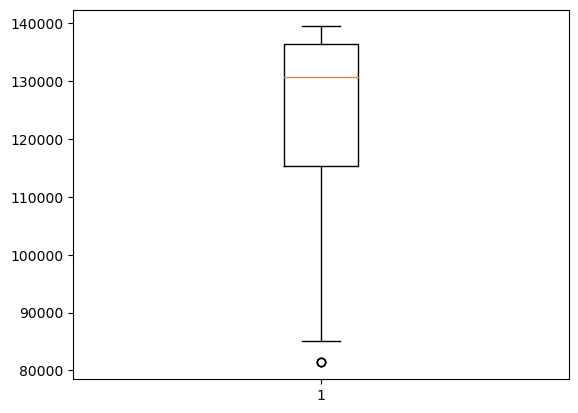

In [1135]:
plt.boxplot(X_train['Page total likes'])
plt.show()

De lo anterior se observa que los datos tienen un sesgo a la izquierda, pero no se observan valores atípicos. Ahora revisemos la variable de salida.

<AxesSubplot: >

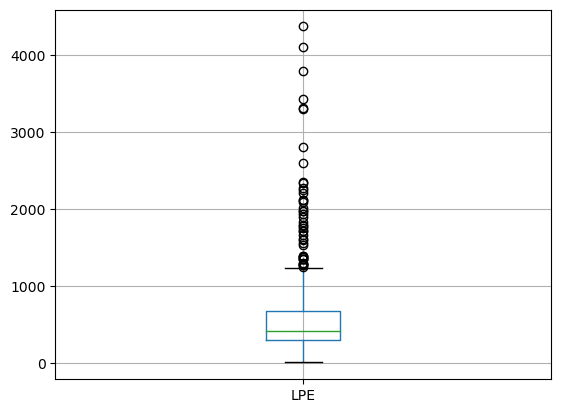

In [1136]:
y_train.boxplot()

array([[<AxesSubplot: title={'center': 'LPE'}>]], dtype=object)

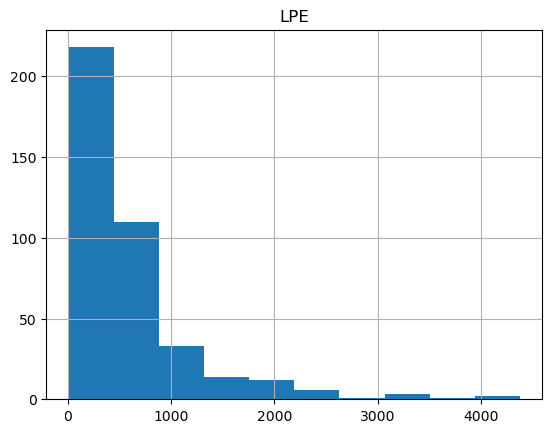

In [1137]:
y_train.hist()

De los gráficos anteriores se observa un sesgo a la derecha. También se puede observar del diagrama de caja valores atípicos que podrían afectar el desempeño de nuestro modelo. Esto significa que debemos realizar una transformación a la variable de salida para fines de entrenamiento. Probemos realizando una transformación logarítimica.

<AxesSubplot: ylabel='Count'>

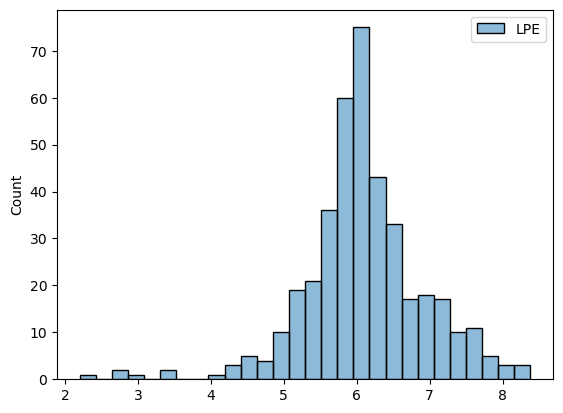

In [1138]:

sns.histplot(np.log(y_train))

La transformación aplicada resulta adecuada, ya que se observa una distribución uniforme de tipo campana.

Ahora procedamos a definir los piplines

In [1139]:
#Preprocessor con todos los pipes y transformaciones
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las columnas cualitativas, ordinales

numeric_cols = ["Page total likes"]
cat_cols = ["Category","Type"]
bin_cols = ["Paid"]
ord_cols = ["Post Month","Post Hour","Post Weekday"]

#Para la variable numérica, proponemos la mediana 50% de la población arriba y por debajo del umbral
#Realizamos una transformación z-score
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler()),                            
                        ]
                      )

# Transformaciones para las variables categóricas, ordinales y binaria
#Para las variables categóricas, ordinales y binarias proponemos el equivalente a la moda para distribuciones, es decir, estaremos imputando usando el valor que más se repite
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder(handle_unknown='ignore'))
                            ]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols + bin_cols),
                        ('ord', SimpleImputer(strategy="most_frequent"), ord_cols)
                                            ],
                    remainder='passthrough'
                )

#**Ejercicio-5.**

Realizamos el entrenamiento de un modelo dummy, el cual nos arrojará los resultados mínimos a lograr para cada modelo que estaremos probando.

In [1140]:
#Particionamos el conjunto de entrenamiento y validación en 25% para validación (100) y el restante para entrenamiento.
X_train_dummy, X_val_dummy, y_train_dummy, y_val_dummy = train_test_split(X_train, y_train, test_size = 0.25)

In [1141]:
#Entrenamos el Dummy regressor

dummy_pipe = Pipeline (steps = [
      ("transformer", preprocessor), 
      ("model", DummyRegressor())
      ])


final_model=TransformedTargetRegressor(regressor=dummy_pipe, 
                                  func= np.log, 
                                  inverse_func= np.exp) 

final_model.fit(X_train_dummy, y_train_dummy.values.ravel())

train_predictions = final_model.predict(X_train_dummy)
test_predictions = final_model.predict(X_val_dummy)

In [1142]:
#Imprimimos las métricas

print_metrics(train_predictions, y_train_dummy.values.ravel(), "Train Dummy Regressor")
print_metrics(test_predictions, y_val_dummy.values.ravel(), "Test Dummy Regressor")

-------Métricas Train Dummy Regressor-------

RMSE: 639.5043 

MAE: 343.3746 

MAPE: 0.7553 

-------Métricas Test Dummy Regressor-------

RMSE: 608.2024 

MAE: 339.5862 

MAPE: 0.7469 



#**Ejercicio-6.**

Procedemos a entrenar nuestros modelos

In [1143]:

kfold = RepeatedKFold (n_splits= 5, n_repeats= 3, random_state=42)

In [1144]:

model_names = ["Multiple Linear Regression", "Random Forest", "Multilayer Perceptron"]
models = [
   LinearRegression(), 
    RandomForestRegressor(), 
    MLPRegressor(max_iter = 50000)]


In [1145]:


scores = [] # Donde irán los resultados para el boxplot
scorings = {
      'MAPE': 'neg_mean_absolute_percentage_error', # make_scorer(calculate_MAPE, greater_is_better = False), 
      'MAE': make_scorer(calculate_MAE,greater_is_better = False), 
      'RMSE': make_scorer(calculate_RMSE,greater_is_better = False)}

for i in range(len(models)):
    
    pipe = Pipeline (steps = [
      ("transformer", preprocessor), 
      ("model", models[i])
      ]) 
    
    final_model=TransformedTargetRegressor(regressor=pipe, 
                                  func= np.log, 
                                  inverse_func= np.exp) 

    score = cross_validate(
      estimator = final_model, 
      X = X_train, 
      y = y_train.values.ravel(), 
      cv=kfold, 
      scoring = scorings, 
     return_train_score= True,
     
      n_jobs = -1)
    
    
  
    scores.append(score["test_MAPE"])
    print_scores(score, model_names[i])
    

Multiple Linear Regression train scores

mean RMSE: -530.895 (16.9794) 
mean MAE: -281.564  (9.7480)
mean MAPE: -0.807 (0.0875) 


Multiple Linear Regression test scores

mean RMSE: -544.076 (78.6654) 
mean MAE: -291.927  (37.1803)
mean MAPE: -0.873 (0.4138) 

Random Forest train scores

mean RMSE: -272.627 (12.1109) 
mean MAE: -129.381  (5.9884)
mean MAPE: -0.214 (0.0112) 


Random Forest test scores

mean RMSE: -539.965 (71.3136) 
mean MAE: -303.318  (37.9030)
mean MAPE: -0.893 (0.3861) 

Multilayer Perceptron train scores

mean RMSE: -433.701 (21.8834) 
mean MAE: -230.645  (12.3070)
mean MAPE: -0.522 (0.0598) 


Multilayer Perceptron test scores

mean RMSE: -605.824 (120.7428) 
mean MAE: -325.748  (57.4634)
mean MAPE: -0.985 (0.4286) 



De los resultados obtenidos arriba podemos observar que prácticamente todos los modelos están sobreentrenados. Esto se evidencia porque los valores del MAPE obtenidos del entrenamiento son mucho mas bajos que los que se obtiene del conjunto de validación.

#**Ejercicio-7.**

Realizamos el diagrama de caja de los resultados obtenidos de cada modelo


Boxplot chart



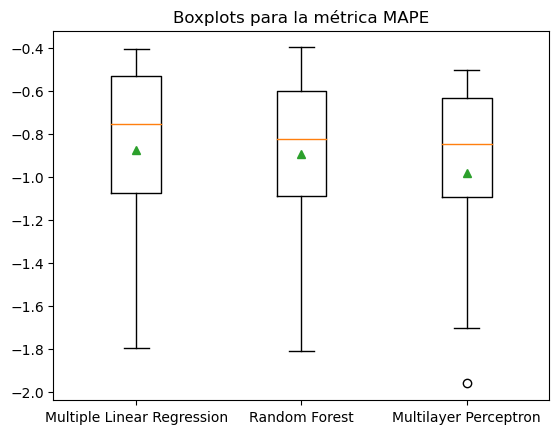

In [1146]:
print("\nBoxplot chart\n")
plt.title("Boxplots para la métrica MAPE")
plt.boxplot(scores,labels=model_names,showmeans=True)

plt.show()

Del gráfico anterior podemos observar una alta variablidad en la métrica del MAPE para cada uno de los modelos. Por ejemplo, el MAPE varía entre 0.4 y 1.8 aproximadamente, con una variabilidad y una media muy similar entre cada uno de los modelos.

Una posible causa de esta alta variabilidad del MAPE en los modelos podría deberse a que se cuentan con relativamente pocos datos para entrenar (el dataset tiene apenas 500 entradas), como se comentó arriba. Por tanto, es de esperarse que tengamos valores muy diferentes cada vez que corramos los modelos.

Por otro lado, si comparamos estos resultados con lo obtenidos por los autores podemos evidenciar que estos se encuentran muy lejos del 0.27 que se muestra en el artículo. Esto es un indicativo de que estos modelos están subentrenados, pues el mejor MAPE logrado durante el entrenamiento fue de cerca de un 0.40, aún muy lejos del 0.27 que obtuvieron los autores.

#**Ejercicio-8.**

Ahora procedamos a buscar los valores óptimos para el modelo MLP

In [1163]:
warnings.filterwarnings("ignore")

ColumnPreprocessor = preprocessor

model = MLPRegressor(max_iter=100000)

fullPipeline = Pipeline(steps = [('preprocessor', ColumnPreprocessor),('regressor', model)])

#Transformamos las y
final_model=TransformedTargetRegressor(regressor=fullPipeline, 
                                  func= np.log,
                                  inverse_func= np.exp
                                   ) 

parameter_space = {
    'regressor__regressor__hidden_layer_sizes': [(1,1), (5,5), (5,5,5), (10,10), (10,5,1), (15,15), (15,15,15)],
    'regressor__regressor__alpha': [0.0001,0.001, 0.01, 0.05,1,5,10],
    'regressor__regressor__learning_rate_init': [0.01,0.1,0.5,1,5,10],
}

search = GridSearchCV(final_model, 
                      parameter_space, 
                      n_jobs=-1,
                      cv=kfold,
                      scoring=make_scorer(calculate_MAPE, greater_is_better = False)  
                      )

search.fit(X_train, y_train.values.ravel())

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/Users/rmateoc/opt/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:292: RuntimeWarning: overflow encountered in exp
  return func(X, **(kw_args if kw_args else {}))
/Users/rmateoc/opt/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:292: RuntimeWarning: overflow encountered in exp
  return func(X, **(kw_args if kw_args else {}))
/Users/rmateoc/opt/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:292: RuntimeWarning: overflow encountered in exp
  return func(X, **(kw_args if kw_args else {}))
/Users/rmateoc/opt/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:292: RuntimeWarning: overflow encountered in exp
  return func(X, **(kw_args if kw_args else {}))
/Users/rmateoc/opt/anaconda3/envs/python310/lib/python3.10/site-packages/sklearn/preprocessing/_function_transformer.py:292: Run

Best parameter (CV score=-0.817):
{'regressor__regressor__alpha': 1, 'regressor__regressor__hidden_layer_sizes': (5, 5, 5), 'regressor__regressor__learning_rate_init': 0.1}


In [1164]:
search.best_estimator_.fit(X_train, y_train.values.ravel())
predict = search.best_estimator_.predict(X_test)

calculate_MAPE(y_test.values.ravel(), predict)

0.7355067087530277

#**Ejercicio-9.**

Feature: Category, Score: 0.01400
Feature: Page total likes, Score: 0.09942
Feature: Type, Score: 0.68262
Feature: Post Month, Score: 0.25778
Feature: Post Hour, Score: 0.07421
Feature: Post Weekday, Score: 0.00309
Feature: Paid, Score: -0.00744


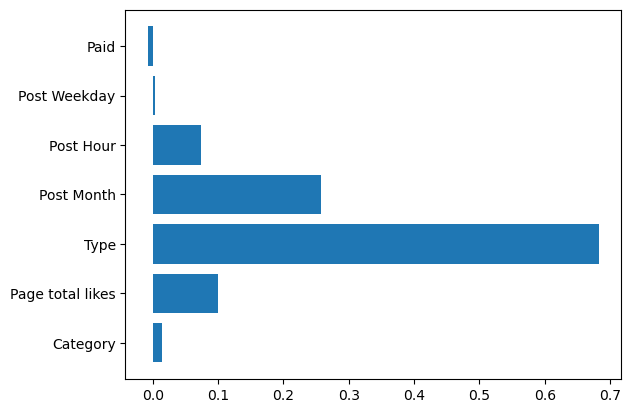

In [1165]:
importance = permutation_importance(search.best_estimator_, X_test, y_test.values.ravel(), n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %s, Score: %.5f' % (X.columns[i],v))
 
plt.barh(X.columns.to_numpy(), importance['importances_mean'])
plt.show()

**Conclusiones**

Del gráfico anterior se puede apreciar que la variable "Post Month" es la que representa mayor importancia respectoa las demás. En segundo lugar se encuentra la variable "Type" con un 30% aproximadamente.

Esto significa que para optimizar el LPE contribuye mucho el es en el que se hace la publicación, así como el tipo y el total de likes de la página. Las demás variables presentan poca importancia respecto a las 3 ya mencionadas.

Sin embargo, es importante destacar que el modelo final resultó con un MAPE de alrededor de 0.95 con el conjunto de prueba. Esto significa que el % de error es muy alto como para poder concluir que estos resultados sean confiables.

Procedamos a evaluar los resultados de los otros modelos.

#**Ejercicio-10.**

In [1150]:
ColumnPreprocessor = preprocessor

mi_regressor = RandomForestRegressor(n_jobs=-1)

fullPipeline = Pipeline(steps = [('preprocessor', ColumnPreprocessor),('regressor', mi_regressor)])

final_model=TransformedTargetRegressor(regressor=fullPipeline, 
                                  func= np.log,
                                  inverse_func= np.exp
                                   ) 

parameter_space = {
    'regressor__regressor__criterion':['squared_error', 'absolute_error', 'poisson'], 
    'regressor__regressor__ccp_alpha':[0,0.1,1], 
    'regressor__regressor__max_depth':[1,5,10], 
    'regressor__regressor__min_samples_split':[0.1,0.5,1.0],
    'regressor__regressor__min_samples_leaf':[0.1,0.5,0.8],
    'regressor__regressor__n_estimators':[100,200],}
    #'regressor__regressor__max_features':['sqrt', 'log2', None]}

search = GridSearchCV(final_model, 
                      parameter_space, 
                      n_jobs=-1,
                      cv=kfold,
                      scoring=make_scorer(calculate_MAPE,greater_is_better=False)   
                      )

search.fit(X_train, y_train.values.ravel())

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.813):
{'regressor__regressor__ccp_alpha': 0, 'regressor__regressor__criterion': 'absolute_error', 'regressor__regressor__max_depth': 5, 'regressor__regressor__min_samples_leaf': 0.1, 'regressor__regressor__min_samples_split': 0.5, 'regressor__regressor__n_estimators': 100}


In [1151]:
search.best_estimator_.fit(X_train, y_train.values.ravel())
predict = search.best_estimator_.predict(X_test)

calculate_MAPE(y_test.values.ravel(), predict)

0.6847958475419368

Feature: Category, Score: -0.00000
Feature: Page total likes, Score: 0.02758
Feature: Type, Score: 0.00194
Feature: Post Month, Score: 0.00002
Feature: Post Hour, Score: -0.00000
Feature: Post Weekday, Score: -0.00000
Feature: Paid, Score: -0.00000


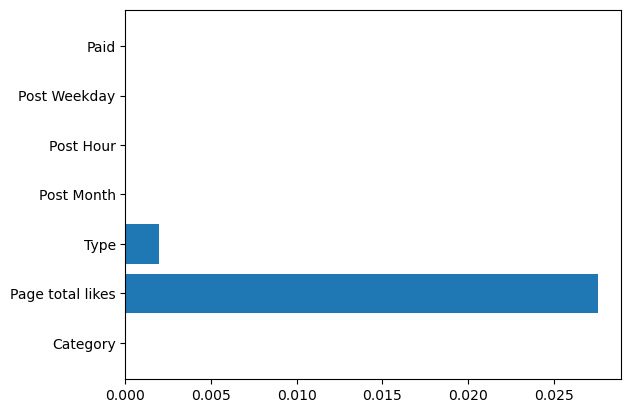

In [1152]:
importance = permutation_importance(search.best_estimator_, X_test, y_test.values.ravel(), n_repeats=10)

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %s, Score: %.5f' % (X.columns[i],v))
 
plt.barh(X.columns.to_numpy(), importance['importances_mean'])
plt.show()

**Conclusiones**

Con este modelo se obtuvieron resultados similares al MLP, donde se observa que las 2 variables de mayor importancia son Type y Page total likes. Sin embargo, a diferencia del modelo anterior, se observa que las demás variables no tuvieron gran importancia para los resultados de este modelo.

Un punto importante a destacar es que este modelo fue el que mejor desempeño obtuvo en función del MAPE, con un 0.68.

#**Ejercicio-11.**

In [1166]:
ColumnPreprocessor = preprocessor


mi_regressor = LinearRegression()

fullPipeline = Pipeline(steps = [('preprocessor', ColumnPreprocessor),('regressor', mi_regressor)])

final_model=TransformedTargetRegressor(regressor=fullPipeline, 
                                  func= np.log,
                                  inverse_func= np.exp
                                   ) 


parameter_space = {
    'regressor__regressor__fit_intercept': [True, False],
    'regressor__regressor__copy_X': [True, False],
}

search = GridSearchCV(final_model, 
                      parameter_space, 
                      n_jobs=-1,
                      cv=kfold,
                      scoring=make_scorer(calculate_MAPE,greater_is_better=False)   
                      )

search.fit(X_train, y_train.values.ravel())

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.873):
{'regressor__regressor__copy_X': True, 'regressor__regressor__fit_intercept': True}


In [1167]:
search.best_estimator_.fit(X_train, y_train.values.ravel())
predict = search.best_estimator_.predict(X_test)

calculate_MAPE(y_test.values.ravel(), predict)

0.9071350671257629

Feature: Category, Score: -0.02197
Feature: Page total likes, Score: 0.23624
Feature: Type, Score: 0.77492
Feature: Post Month, Score: 0.72734
Feature: Post Hour, Score: -0.00797
Feature: Post Weekday, Score: 0.00817
Feature: Paid, Score: -0.00683


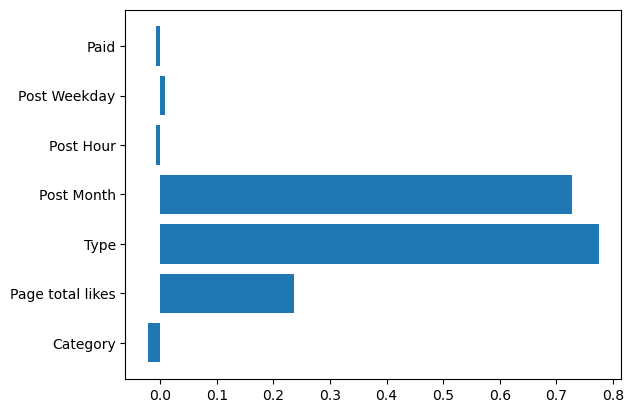

In [1159]:
importance = permutation_importance(search.best_estimator_, X_test, y_test.values.ravel(), n_repeats=10)

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %s, Score: %.5f' % (X.columns[i],v))
 
plt.barh(X.columns.to_numpy(), importance['importances_mean'])
plt.show()

**Conclusiones**

En este último modelo también se logra un resultado similar al modelo de MLP, pero con un MAPE mucho mayor. De nuevo se puede observar que las 3 variables de mayor importancia son Post Month, Type y Page total likes.

#**Ejercicio-12.**

Al momento de correr estos modelos se pudo observar que los tres llegaron a conclusiones muy similares, donde las 3 variables que representan mayor importancia para el LPE son:

* Post Month
* Type
* Page total Likes

Lo anterior coincide con los hallazgos de los autores, aunque con magnitudes de importancia un tanto diferentes.

Sin embargo, en comparación con lo obtenido por los autores para el MAPE, se observa que estos modelos están subentrenados puesto que ninguno estuvo cerca del mejor MAPE logrado por los autores, el cual fue de un 0.27 aproximadamente. Esto hace que las predicciones de nuestros modelos no sean lo suficientemente confiables, por tener MAPES con los datos de prueba muy altos.

Una de las posibles razones de esta variación se deba a que los autores utilizaron otro modelo (SVM), además que su conjunto de datos contaba con alrededor de 800 registros, mientras el utilizado para este ejercicio fue de solo 500. Esto se debe a que varias de las entradas fueron eliminadas por confidencialidad, según se describía en la fuente de donde se obtuvieron los datos.

###**Fin de la Actividad de la semana 7.**